# Data Exploration

The task here is to do A/B testing for my employeer, SmartAd. This particular test is carried out to determine a new Ads influence on custemers awareness of a brand. We have three paths we will explore.

1. Classical frequnetist method
2. Sequential methods
3. Using Machine Learning (Feature importance evaluation)

But in this Notebook, we I will be familiarizing my self with the given data. 

These are the things I will check for:

- I will check if there are any missing column,
- Verify if there are any datatype conversions that need to be done,
- count the number of participants in each group (exposed and controll)
- Get the date range for the experiment,
- Get some plots that show correlation bettween the features



In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append("../")

from scripts.utils import DataLoader
from scripts.cleaning import CleanDataFrame
from scripts.exploration import Analysis
from scripts.visualization import Plotters

In [2]:
df = DataLoader("../data", "AdSmartABdata.csv").read_csv()

In [13]:
cleaners = CleanDataFrame()
analyzers = Analysis()
plotters = Plotters(w=6, h=4)

In [4]:
cleaners.percent_missing(df)

The dataset contains 0.0 % missing values.


In [5]:
display(analyzers.get_shape(df))
display(df.head())


The dataframe has 8077 rows and 9 columns


None

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


* There are rows where both yes and no columns are 0. This means that the user didn't repond to the questionieer. So, I will be removing those
* I will convert the date column into a pandas date
* I will also merge the yes and no columns into a single column to make it easier for the eda

In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.query("yes!=0 | no!=0")
analyzers.get_shape(df)
df['response'] = [1] * df.shape[0]
df.loc[df['no'] == 1, 'response'] = 0
df = df.drop(columns=['yes', 'no']).reset_index(drop=True)


The dataframe has 1243 rows and 9 columns


In [8]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


We have dropped the rows where the users didn't reponde.
now, we have 1243 rows

We also replaced the yes and no columns with the response column

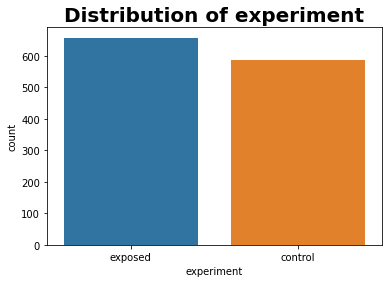

In [14]:
plotters.plot_count(df, 'experiment')

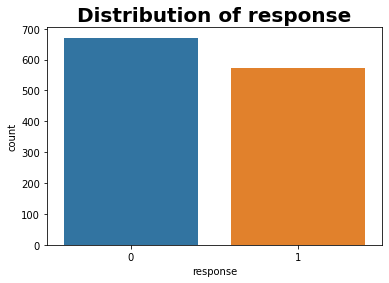

In [23]:
plotters.plot_count(df, 'response')

In [24]:
import seaborn as sns

Controll group's response distribution


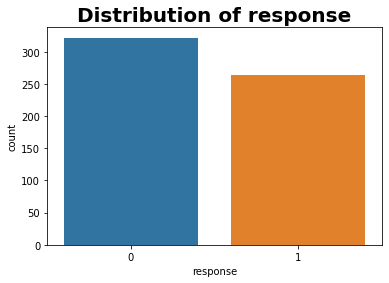

Exposed group's response distribution


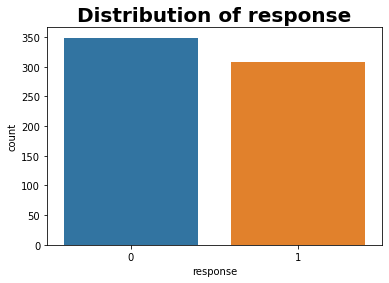

In [32]:
controll = df[df['experiment']=='control']
exposed = df[df['experiment']=='exposed']
print("Controll group's response distribution")
plotters.plot_count(controll, 'response')
print("Exposed group's response distribution")
plotters.plot_count(exposed, 'response')